In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
mpg=sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [18]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


horsepower 열에 missing data가 존재함

<AxesSubplot:>

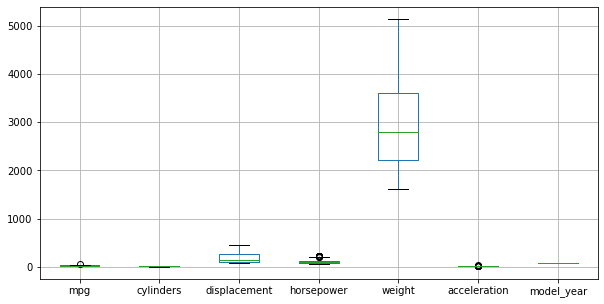

In [35]:
plt.figure(figsize=(10,5))
mpg.boxplot()

편차가 크기 때문에 정규화해줘야

데이터셋의 특징은 순서가 필요 없는 구조(=순서는 중요하지 않음, 순서를 바꿔도 상관 없음), 크기가 같고 독립적이어야 함(정형데이터), missing data가 있으면 안 됨

정통적인 머신러닝에는 1차원 데이터가 필요함, 이미지데이터는 독립적이지 않지만(따라서 numerical stability를 보장못함) 독립하다고 가정하고 정형데이터처럼 처리함, 1차원으로 바꿀 수 있었음(flatten), 이미지는 missing data가 거의 없음, 가정이 항상 안 맞는 상황에 떨어지기 마련, 

In [23]:
from sklearn.datasets import load_digits
data=load_digits(as_frame=True)
data.frame.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


이미지가 가지는 고유한 성격 때문에 나타나는 차원의 저주

정형데이터라면 feature selection을 써서 각

feature가 하나가 아니라 여러개의 columns로 이뤄진거, 조합은 알 수 없지만 숨어있는 manifold를 찾아서 줄이고 처리함

2) 1차로 바꿀 때 의미가 깨져버림, 이미지는 독립성 가정 때문에 바꿀 수 없는데 1차로 바꾸면 고정된 위치가 생기기 때문에 성능이 좌우됨

eda는 모델 성능보단 데이터를 확인하는 것, global feature를 보는 것


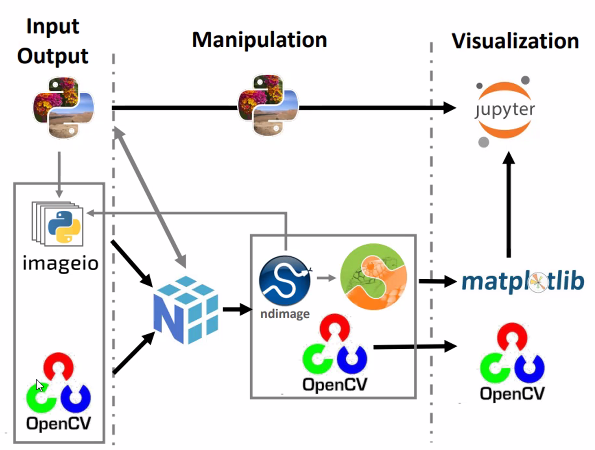

In [1]:
import imageio

In [6]:
img=imageio.imread('C:/Users/samsung/Desktop/img/hanriver.jpg')

ndarray를 상속 받아서 추가기능이 가능함, imageio는 가장 많은 데이터포맷을 지원해주기 때문에 이미지를 불러오는데 용이함

In [23]:
from skimage import io
img_sk=io.imread('C:/Users/samsung/Desktop/img/hanriver.jpg')

In [13]:
import numpy as np
a=np.zeros(img_sk.shape)
imageio.imwrite('x.jpg',a)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


numpy로 array를 만들었지만 array라고 이미지인 것은 아니기 때문에 a는 이미지가 아님

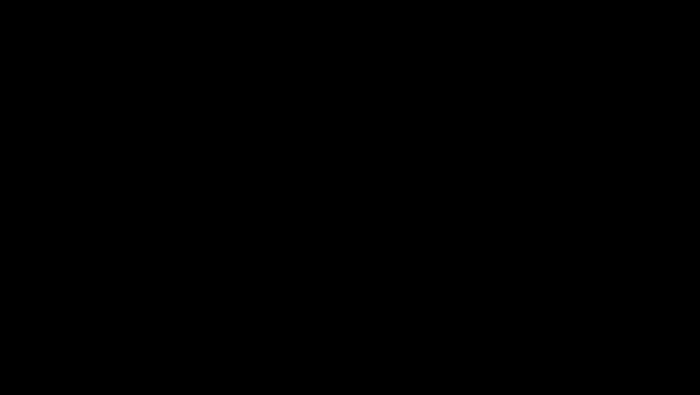

In [15]:
from PIL import Image
Image.open('x.jpg')

In [19]:
img_sk.dtype

dtype('uint8')

uint8이 0에서 255까지기 때문에 normalization 시킴

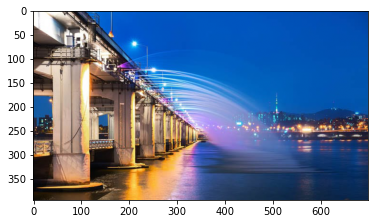

In [24]:
img_sk=img_sk/255
plt.imshow(img_sk)

데이터는 다르지만 사진은 거의 똑같음, 분명히 손실된 값도 존재하지만 의미는 같다

흑백처리 할 때 평균을 취하거나 rgb에 가중치를 둬서 바꿀 수도 있음

## Axis

numpy 구조는 C로 만듦, 메모리가 1차원 형태의 연속된 형태로 저장되기 때문에 파이썬 리스트보다 인덱싱, 슬라이싱이 빠르다

In [41]:
import numpy as np
b=np.arange(24).reshape(4,6) #4 4 4 4 4 4
b.strides

(24, 4)

다음 행렬 가기 위해서 메모리를 24만큼 점프해야 함

In [43]:
img_sk.shape

(395, 700, 3)

In [45]:
np.mean(img_sk, axis=2).shape

(395, 700)

(395, 700, 3)에서 axis=0이면 395 지워서 (700,3), aixs=2이면 3 지우고 (395,700)

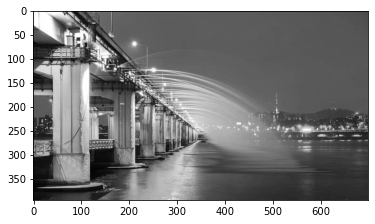

In [37]:
plt.imshow(np.mean(img_sk, axis=2), cmap='gray')

In [59]:
r,g,b=img_sk[0], img_sk[1], img_sk[2]
i3=(r+g+b)/3
i3

array([[0.95294118, 0.93333333, 0.90980392],
       [0.96470588, 0.94509804, 0.92156863],
       [0.98039216, 0.96862745, 0.94901961],
       ...,
       [0.        , 0.25490196, 0.61045752],
       [0.        , 0.25490196, 0.60784314],
       [0.        , 0.25490196, 0.60784314]])

In [58]:
i6=(2*r+3*g+b)/6
i6

array([[0.95294118, 0.93333333, 0.90980392],
       [0.96470588, 0.94509804, 0.92156863],
       [0.98039216, 0.96862745, 0.94901961],
       ...,
       [0.        , 0.25490196, 0.60915033],
       [0.        , 0.25490196, 0.60784314],
       [0.        , 0.25490196, 0.60784314]])

가중평균 구해서 흑백 만들 수도 있다

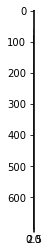

In [61]:
plt.imshow(i6, cmap='gray')

In [62]:
ii=(i*255).astype('uint8')
ii

array([[242, 237, 232],
       [246, 240, 235],
       [250, 247, 241],
       ...,
       [  0,  65, 155],
       [  0,  65, 155],
       [  0,  65, 155]], dtype=uint8)

In [68]:
import tensorflow as tf
import matplotlib as plot
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

y_train에서 0의 개수? imbalanced data를 확인하기 위해서 y값을 꼭 봐야 함

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

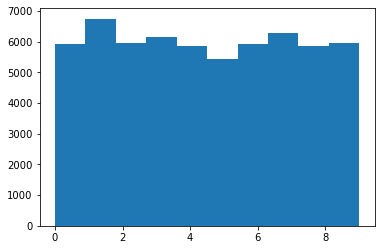

In [69]:
plt.hist(y_train)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

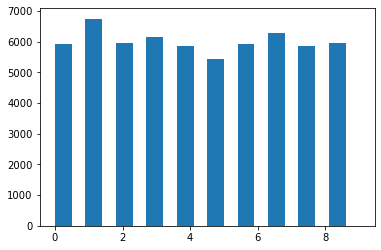

In [70]:
plt.hist(y_train, width=0.5)

In [66]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

(array([610.,  15., 119., 484.,  57.,  13., 118., 421.,  93., 170.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

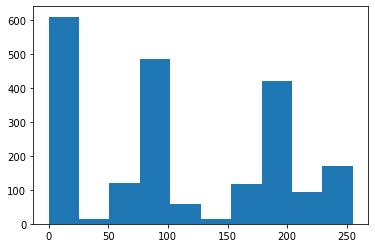

In [72]:
plt.hist(ii.flatten())

(array([343., 146.,  48.,  17.,   9.,   6.,   3.,   2.,   4.,   3.,   3.,
          1.,   2.,   2.,   1.,   3.,   1.,   5.,   1.,   0.,   4.,   0.,
          2.,   1.,   3.,   0.,   0.,   0.,   3.,   0.,   0.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   3.,   1.,   0.,
          0.,   0.,   0.,   1.,   3.,   0.,   0.,   1.,   1.,   1.,   1.,
          1.,   1.,   0.,   1.,   0.,   5.,   0.,   1.,   0.,   0.,   9.,
          3.,   4.,  10.,   5.,   7.,   3.,  20.,   0.,  25.,   9.,  11.,
          4.,  49.,  17.,  34.,  41.,   1.,  10.,  49., 132.,  65.,   8.,
          2.,  11.,   7.,   0.,   2.,   7.,   8.,  10.,   1.,   9.,   3.,
          0.,  12.,   2.,   3.,   3.,   4.,   3.,   4.,   5.,   3.,   5.,
          4.,   3.,   1.,   2.,   3.,   4.,   0.,   3.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   2.,   0.,   3.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0., 

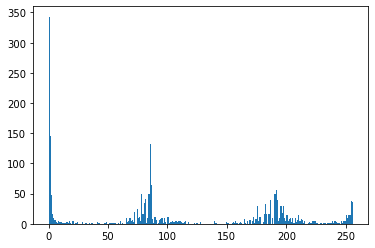

In [74]:
plt.hist(ii.flatten(),256,[0,256])

이미지 전체의 밝기를 알 수 있음, 여기서 더하기 연산을 하면 밝기를 밝게 하는 거고 빼면 어둡게 하는 것

## 1차원 만들기

In [88]:
a=np.arange(24).reshape(4,6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [89]:
b=a.flatten()
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [90]:
c=a.ravel()
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

ravel도 결과적으론 flatten과 같은 역할을 하지만, view와 copy라는 차이가 있음

In [91]:
b[0]=100
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [92]:
c[0]=100
a

array([[100,   1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23]])

flatten은 b를 바꿔도 a가 변하지 않는데(copy), ravel은 c를 바꾸면 a가 바뀜(view) (라벨의 대표곡은 볼레로, 라벨은 뷰)

In [93]:
np.histogram(ii,256)

(array([343, 146,  48,  17,   9,   6,   3,   2,   4,   3,   3,   1,   2,
          2,   1,   3,   1,   5,   1,   0,   4,   0,   2,   1,   3,   0,
          0,   0,   3,   0,   0,   2,   0,   0,   1,   0,   1,   0,   0,
          0,   0,   3,   1,   0,   0,   0,   0,   1,   3,   0,   0,   1,
          1,   1,   1,   1,   1,   0,   1,   0,   5,   0,   1,   0,   0,
          9,   3,   4,  10,   5,   7,   3,  20,   0,  25,   9,  11,   4,
         49,  17,  34,  41,   1,  10,  49, 132,  65,   8,   2,  11,   7,
          0,   2,   7,   8,  10,   1,   9,   3,   0,  12,   2,   3,   3,
          4,   3,   4,   5,   3,   5,   4,   3,   1,   2,   3,   4,   0,
          3,   0,   0,   0,   0,   1,   0,   1,   2,   0,   3,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   2,   1,   0,
          0,   0,   0,   0,   0,   0,   3,   1,   1,   0,   0,   1,   3,
          1,   4,   1,   0,   2,   3,   2,   0,   8,   1,   0,   4,   0,
          7,   0,   5,  11,   1,   8,  30,   4,  11

unique 같은거 몰라도 numpy에도 histogram이 있고 쉽게 그릴 수 있다

In [96]:
import cv2
cv2.calcHist([ii],[0],None,[256],[0,256])

array([[343.],
       [146.],
       [ 48.],
       [ 17.],
       [  9.],
       [  6.],
       [  3.],
       [  2.],
       [  4.],
       [  3.],
       [  3.],
       [  1.],
       [  2.],
       [  2.],
       [  1.],
       [  3.],
       [  1.],
       [  5.],
       [  1.],
       [  0.],
       [  4.],
       [  0.],
       [  2.],
       [  1.],
       [  3.],
       [  0.],
       [  0.],
       [  0.],
       [  3.],
       [  0.],
       [  0.],
       [  2.],
       [  0.],
       [  0.],
       [  1.],
       [  0.],
       [  1.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  3.],
       [  1.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  1.],
       [  3.],
       [  0.],
       [  0.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  0.],
       [  1.],
       [  0.],
       [  5.],
       [  0.],
       [  1.],
       [  0.],
       [  0.],
       [  9.],
       [  

image와 channel이 아닌 images와 channels기 때문에 리스트 형태로 넣어줌, mask는 특정부분만을 지정하는 테크닉

In [97]:
a=np.array([234], dtype='uint8')
a+100

array([78], dtype=uint8)

## np.add와 cv2.add의 차이

In [103]:
np.add(a,100)

array([78], dtype=uint8)

In [100]:
cv2.add(a,100)

array([[255]], dtype=uint8)

opencv는 기본적으로 saturation 연산을 함, add했을 때 결과값이 255보다 크면 더이상 커지지 않고 255가 픽셀값이 됨, 따라서 특별히 이미지의 밝기를 조절할 때 씀

In [119]:
print(np.add(a,21), np.add(a,22), np.add(a,61), np.add(a,100))

[255] [0] [39] [78]


In [98]:
(234+100)%256

78

## 비트연산자

In [121]:
a={1,2,3}
b={2,3,4}

print(a-b)
print(a&b)
print(a|b)
print(a and b)

{1}
{2, 3}
{1, 2, 3, 4}
{2, 3, 4}


In [124]:
1&2 #01과 10이니까 00

0

01과 10를 and 연산 -> 00 -> 0

In [127]:
60&13

12

0011 1100과 0000 1101를 and 연산 -> 0000 1100 -> 12

In [125]:
3&3

3